### Código  para gerar gráficos referentes  a  base  de  dados  de  março, abril, maio,  junho  e dezembro 


In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import os

#sns.set() 


### SINASC_DTNASC CONSOLIDADO:

#### (MARÇO), (MARÇO, ABRIL), (MARÇO, ABRIL, MAIO), (MARÇO, ABRIL, MAIO, JUNHO), (MARÇO, ABRIL, MAIO, JUNHO, DEZEMBRO)

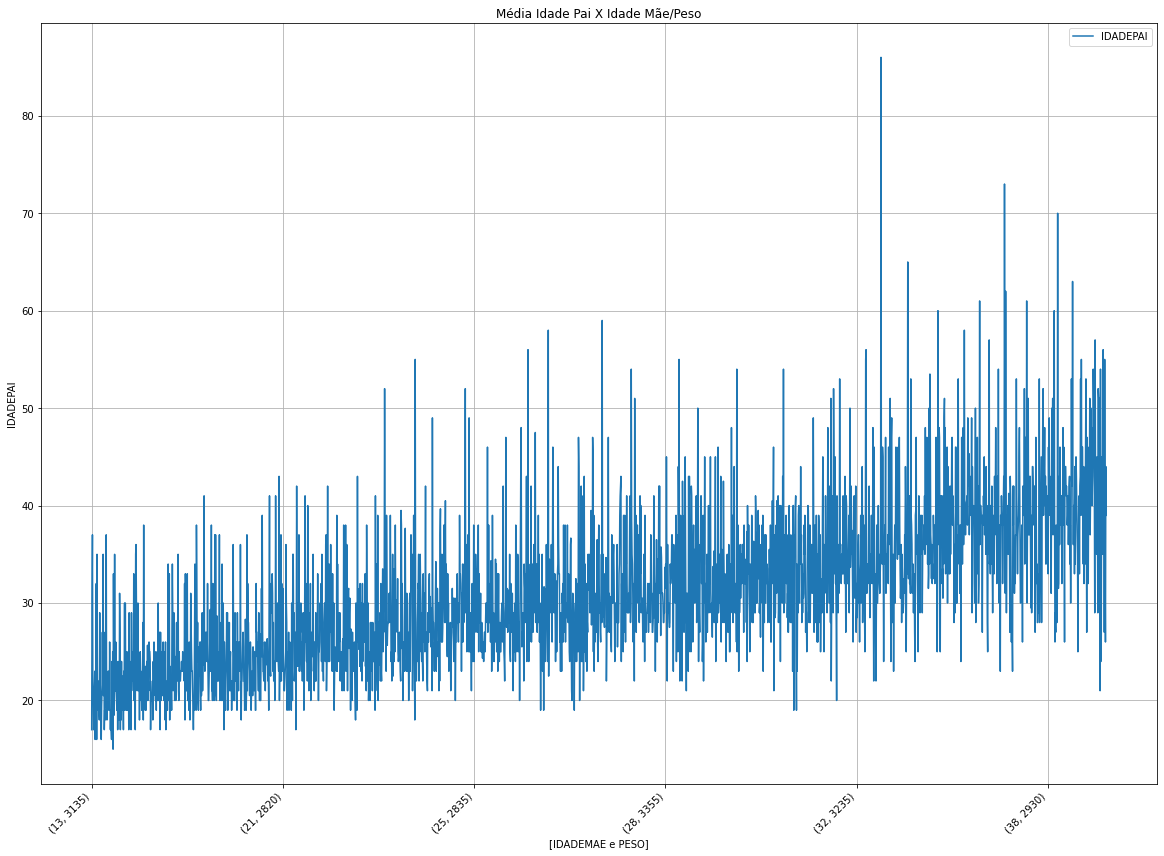

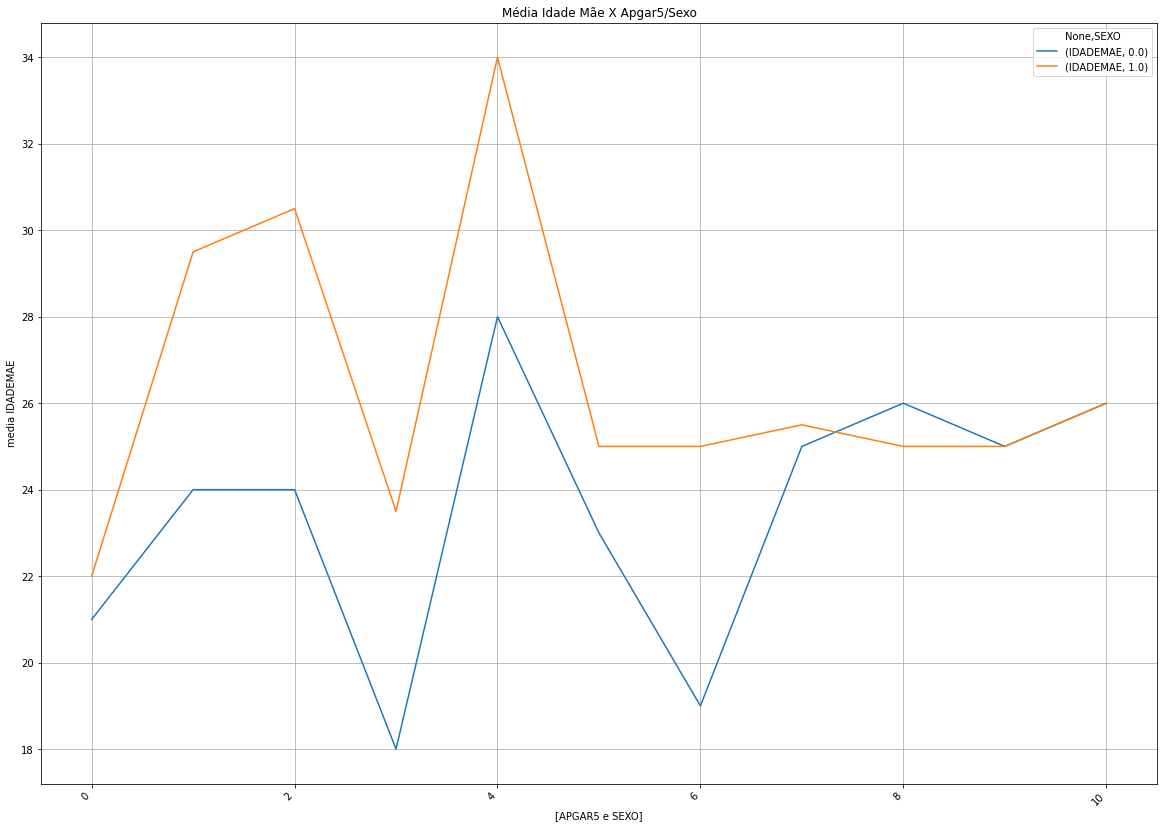

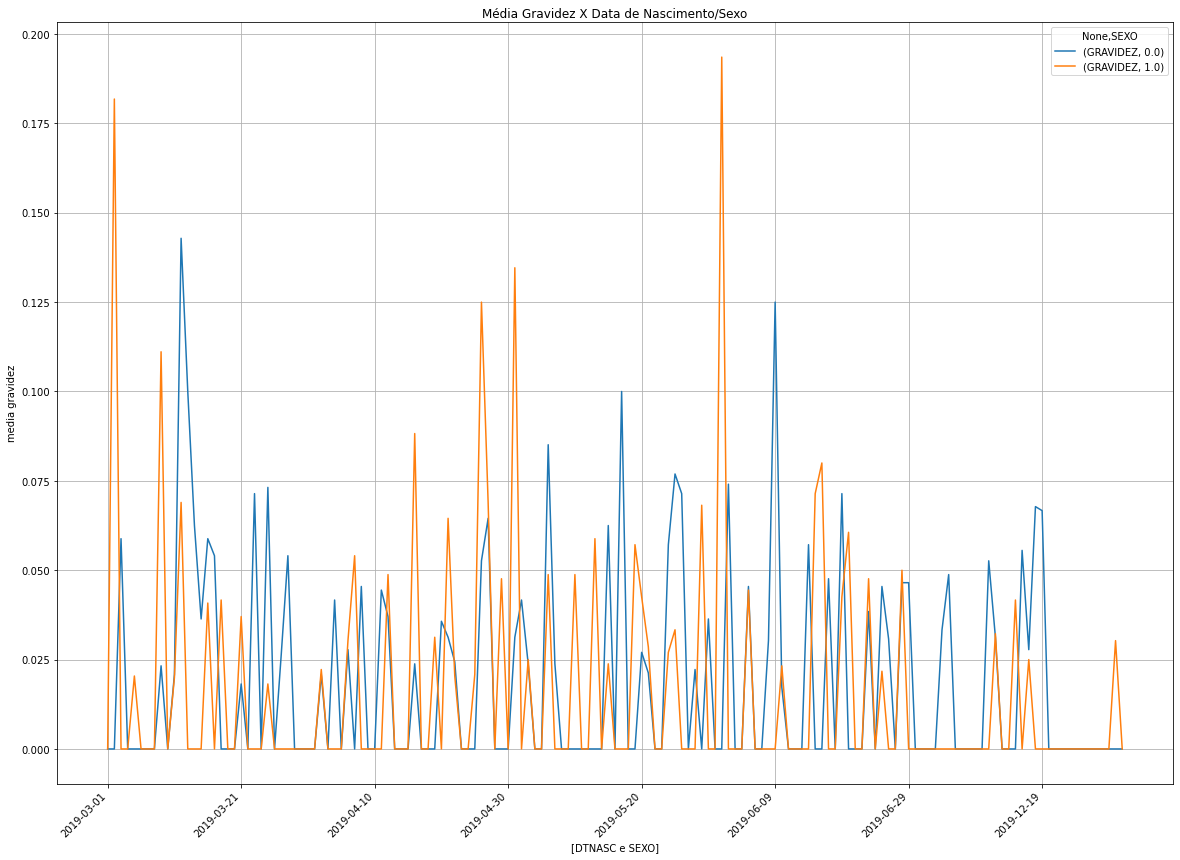

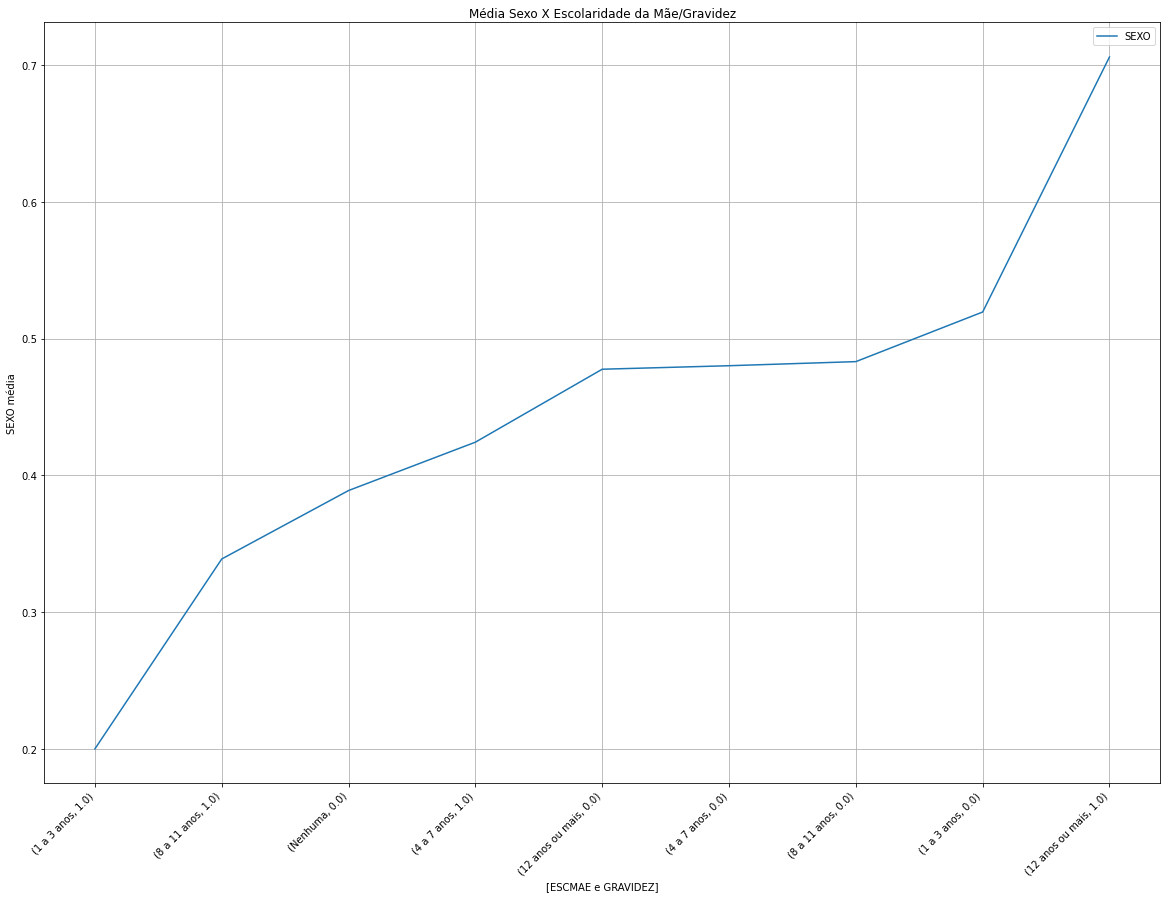

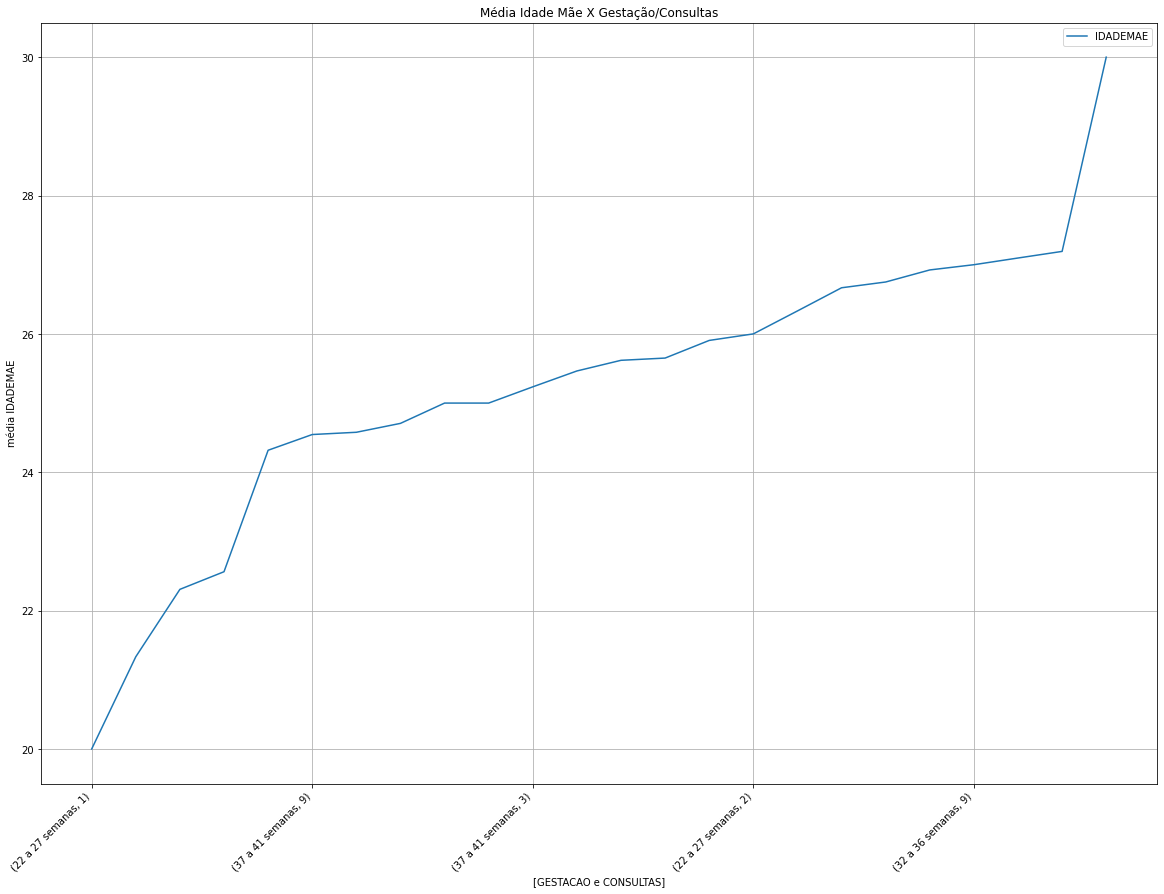

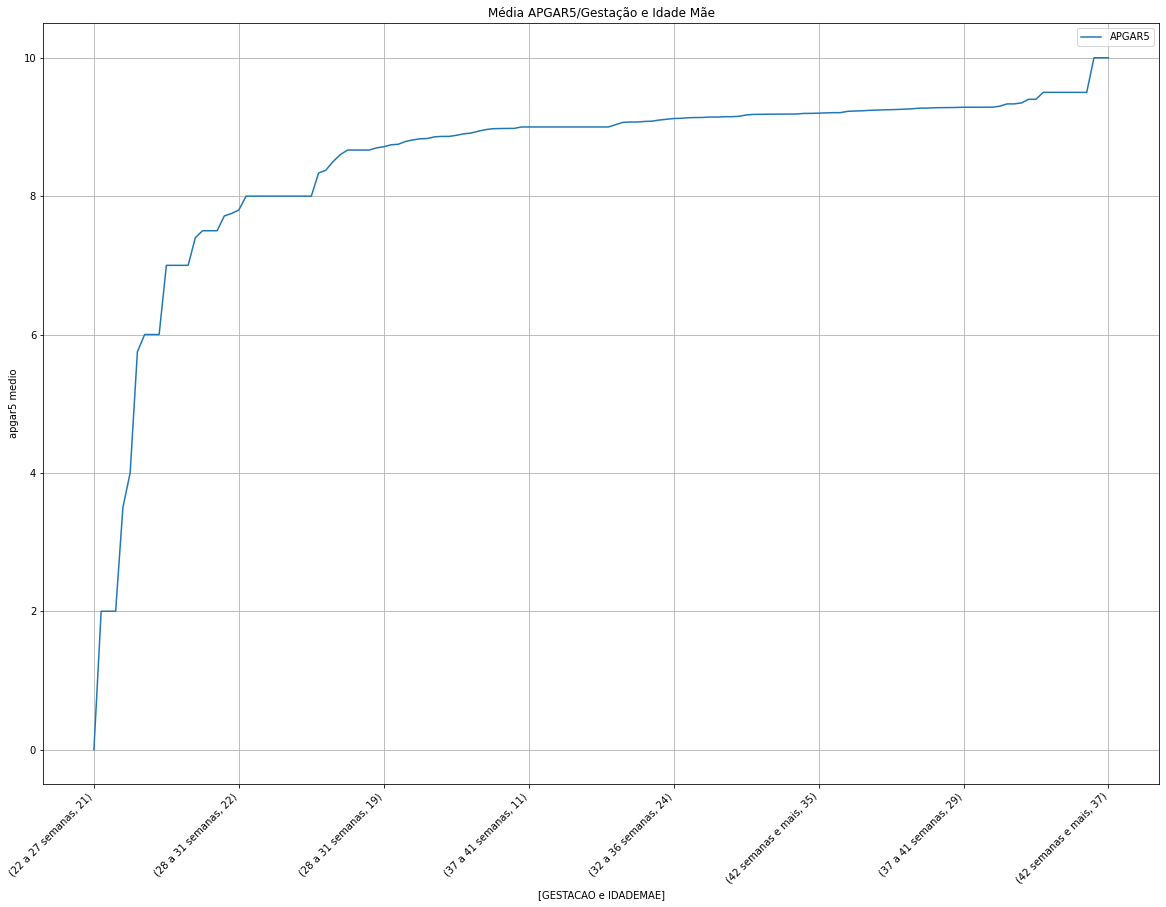

In [7]:

def plota_pivot_table(df, value, index, func, ylabel, xlabel, title, opcao='nada'):  
    
    if opcao == 'nada':
        
        pd.pivot_table(df, values = value, index = index, aggfunc = func).plot(figsize=[20, 14])
        
    elif opcao == 'sort':
        
        pd.pivot_table(df, values = value, index = index, aggfunc = func).sort_values(value).plot(figsize=[20, 14])
        
    elif opcao == 'unstack':
        
        pd.pivot_table(df, values = value, index = index, aggfunc = func).unstack().plot(figsize=[20, 14])
        
    plt.ylabel(ylabel)
    
    plt.xlabel(xlabel)
    
    plt.title(title)
    
    plt.grid(True)
    
    plt.xticks(rotation=45, ha = 'right')
    
    return None

sinasc_consolidado = pd.read_csv('SINASC.RO_2019_DEZ.csv')

sinasc_consolidado.SEXO = sinasc_consolidado.SEXO.map({'Masculino' : 0, 'Feminino': 1})

sinasc_consolidado.GRAVIDEZ = sinasc_consolidado.GRAVIDEZ.map({'Única' : 0, 'Dupla': 1})

max_data = sinasc_consolidado.DTNASC.max()[:7]

os.makedirs('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data, exist_ok=True)

plota_pivot_table(sinasc_consolidado, 'IDADEPAI', ['IDADEMAE','PESO'], 'mean', 'IDADEPAI', '[IDADEMAE e PESO]','Média Idade Pai X Idade Mãe/Peso')

plt.savefig('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data+'/media IDADEPAI por (IDADEMAE e PESO).png')

plota_pivot_table(sinasc_consolidado, 'IDADEMAE', ['APGAR5', 'SEXO'], 'median', 'media IDADEMAE','[APGAR5 e SEXO]', 'Média Idade Mãe X Apgar5/Sexo','unstack')

plt.savefig('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data+'/media IDADEMAE por (APGAR5 e SEXO).png')

plota_pivot_table(sinasc_consolidado, 'GRAVIDEZ', ['DTNASC', 'SEXO'], 'mean', 'media gravidez','[DTNASC e SEXO]', 'Média Gravidez X Data de Nascimento/Sexo','unstack')

plt.savefig('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data+'/media gravidez por (DTNASC e SEXO).png')

plota_pivot_table(sinasc_consolidado, 'SEXO', ['ESCMAE','GRAVIDEZ'], 'mean', 'SEXO média', '[ESCMAE e GRAVIDEZ]', 'Média Sexo X Escolaridade da Mãe/Gravidez','sort')

plt.savefig('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data+'/media sexo por (ESCMAE e GRAVIDEZ).png')

plota_pivot_table(sinasc_consolidado, 'IDADEMAE', ['GESTACAO','CONSULTAS'], 'mean', 'média IDADEMAE','[GESTACAO e CONSULTAS]', 'Média Idade Mãe X Gestação/Consultas','sort')

plt.savefig('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data+'/media IDADEMAE por (GESTACAO e CONSULTAS).png')

plota_pivot_table(sinasc_consolidado, 'APGAR5', ['GESTACAO','IDADEMAE'], 'mean', 'apgar5 medio','[GESTACAO e IDADEMAE]', 'Média APGAR5/Gestação e Idade Mãe','sort')

plt.savefig('./Graficos/Marco_abril_Maio_Junho_Dezembro/'+max_data+'/media apgar5 por (GESTACAO e IDADEMAE).png')


